<a href="https://colab.research.google.com/github/Elena8719/math/blob/main/lesson%2010_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

F_onewayResult(statistic=177.48291613374704, pvalue=1.420466900107174e-12)

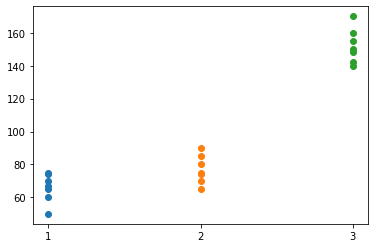

In [3]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

y1 = np.array([70, 50, 65, 60, 75, 67, 74])
y2 = np.array([80, 74, 90, 70, 75, 65, 85])
y3 = np.array([148, 142, 140, 150, 160, 170, 155])

f, ax = plt.subplots()
for xe, ye in zip([1, 2, 3], [y1, y2, y3]):
    plt.scatter([xe] * len(ye), ye, label='xx')
plt.xticks([1, 2, 3])

# Найдем значения критерия фишера для однофакторного дисперсионного анализа.
f = stats.f_oneway(y1, y2, y3)
f

In [4]:
k= 3
n = 21

F_н=(σ_ф^2)/(σ_ост^2 ), а величины σ_ф^2  и σ_ост^2  мы найдем из формул :
〖 σ〗_ф^2=  (S_ф^2)/(k-1), где k= 3 
 σ_ост^2=(S_ост^2)/(n-k), где n = 21 Это общее количество значений заработных плат во всех трех подгруппах.
S_ф^2=∑_(i=1)^k▒〖〖((y_i ) ̅-Y ̅)〗^2*n_i 〗
S_ост^2=∑_(i=1)^k▒∑_(j=1)^(n_i)▒〖〖〖(y〗_ij-(y_i ) ̅)〗^2  〗


In [5]:
y_mean_1 = np.mean(y1)
y_mean_1

65.85714285714286

In [6]:
y_mean_2 = np.mean(y2)
y_mean_2

77.0

In [7]:
y_mean_3 = np.mean(y3)
y_mean_3

152.14285714285714

In [12]:
total = np.array([y1, y2, y3 ])
total

array([[ 70,  50,  65,  60,  75,  67,  74],
       [ 80,  74,  90,  70,  75,  65,  85],
       [148, 142, 140, 150, 160, 170, 155]])

In [13]:
y_mena_total= np.mean(total)
y_mena_total

98.33333333333333

Сумма квадратов отклонений наблюдений от общего среднего

In [22]:
np.sum((total - 98.33)**2) # отложим это значение

32400.6669

Сумма квадратов отклонений средних групповых значений от общего среднего 

In [36]:
S_f = np.sum((y_mean_1 - 98.33)**2) * 7 + np.sum((y_mean_2 - 98.33)**2) * 7 + np.sum((y_mean_3 - 98.33)**2) * 7 # S_f
S_f

30836.952614285707

Остаточная сумма квадратов отклонений

In [38]:
S_ost = np.sum((y1-y_mean_1)**2) + np.sum((y2-y_mean_2)**2) + np.sum ((y3-y_mean_3)**2) # S_ost
S_ost

1563.7142857142858

In [35]:
30836.952614285707 + 1563.7142857142858

32400.666899999993

In [41]:
D_f = S_f / ( k - 1)
D_f

15418.476307142853

In [43]:
D_ost = S_ost / ( n - k)
D_ost

86.87301587301587

In [44]:
F_n = 15418.476307142853 / 86.87301587301587
F_n

177.48291747670376

In [ ]:
# 2 way

In [47]:

from statsmodels.stats.multicomp import pairwise_tukeyhsd

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [60]:
import pandas as pd
df = pd.DataFrame({'score': [ 70,  50,  65,  60,  75,  67,  74,
                              80,  74,  90,  70,  75,  65,  85,
                             148, 142, 140, 150, 160, 170, 155],
                   'group': np.repeat(['accountant', 'lawyer', 'programmer'], repeats=7)}) 

In [61]:
tukey = pairwise_tukeyhsd(endog=df['score'],
                          groups=df['group'],
                          alpha=0.05)
print(tukey)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1     group2   meandiff p-adj   lower   upper  reject
------------------------------------------------------------
accountant     lawyer  11.1429 0.0917 -1.5675 23.8532  False
accountant programmer  86.2857  0.001 73.5754  98.996   True
    lawyer programmer  75.1429  0.001 62.4325 87.8532   True
------------------------------------------------------------
